# COMP 4448: Data Science Tools II - Data Cleaning Assessment

### Robert Kraemer

<b>Due:</b> Oct 3 at 11:59pm 

<b>Background Information:</b> The United States Census Bureau, leads the country’s Federal Statistical System; its primary responsibility is to collect data about the American people and economy to help inform strategic initiatives. Every ten years, the census is conducted to mine information regarding the US population to inform the allocation of billions of dollars of funding to various endeavors (e.g., the building and maintaining of hospitals, schools, fire departments, transportation infrastructure, etc.). Additionally, the collection of census information helps examine the demographic characteristics of subpopulations across the country.

<b>Packages:</b> 

In [476]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### The Data

You have provided a sample dataset from the US Census archive containing detailed, anonymized information for ~300,000 individuals. This archive contains three files:

1. census_income_metadata.txt (metadata for both datasets).

In [477]:
col_names = ['AAGE','ACLSWKR','ADTIND','ADTOCC','AHGA','AHRSPAY','AHSCOL','AMARITL','AMJIND','AMJOCC', 
             'ARACE','AREORGN','ASEX','AUNMEM','AUNTYPE','AWKSTAT','CAPGAIN','CAPLOSS','DIVVAL','FILESTAT',
             'GRINREG','GRINST','HHDFMX','HHDREL','MARSUPWT','MIGMTR1','MIGMTR3','MIGMTR4','MIGSAME','MIGSUN',
             'NOEMP','PARENT','PEFNTVTY','PEMNTVTY','PENATVTY','PRCITSHP','SEOTR','VETQVA','VETYN','WKSWORK',
             'YEAR','TARGET']

2. census_income_train.csv (data for model training)

In [478]:
census_income_train = pd.read_csv('census_income_train.csv', index_col=False, names=col_names, header=None, skipinitialspace=True)
census_income_train.shape

(199523, 42)

3. census_income_test.csv (data for model testing)

In [479]:
census_income_test = pd.read_csv('census_income_test.csv', index_col=False, names=col_names, header=None, skipinitialspace=True)
census_income_test.shape

(99762, 42)

Problem Statement.

 For this technical assessment, you are tasked with the responsibility of cleaning and exploring the data

Considerations for your data analysis should include but are not limited to the following:

• <b>Data Preparation:</b> Data cleaning, preprocessing, feature engineering, etc., that may aid in improving data clarity

The goal is to later use this data to identify characteristics associated with a person making more or less than $50,000 per year; the target variable for your research question is the final column of the datasets.  This goal is to be achieved in another assignment, you only need to prepare and explore the data at this time, but it is good to have the big picture of what will be done later with this data later in the course. You will later use the clean data in another assignment (week 9) for predictive modeling. 

• <b>Exploratory Data Analysis:</b> Numerical and graphical representations of the data may help inform insights and tactics for answering the research question of interest.

Here is my advice for you, there is more you can do:

1. Clean the data first, (and your data cleaning could include (but is not limited to) the following:

- Clean text values, normalize the text: remove white spaces, etc.

- Inspect unique values to all variables (you can use a loop) to ensure weird values are not in the data. You may find question marks etc., as values, which you will need to deal with.

- Make certain variable types are set correctly for each variable; you can use a for loop or/and create a function to do this

- Check missing values, and decide how to deal with missingness... it might be advisable to drop available if it is missing more than 30 percent of the data 

- Handle other issues you may identify with the data

In [480]:
census_income_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   199523 non-null  object 
 2   ADTIND    199523 non-null  int64  
 3   ADTOCC    199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    199523 non-null  object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    199523 non-null  object 
 9   AMJOCC    199523 non-null  object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    199523 non-null  object 
 14  AUNTYPE   199523 non-null  object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  object 
 20  GRIN

In [481]:
def convert_missing_values(df): 
    identifiers = ['?','NA','nan','Do not know','Not in universe','Not identifiable',
                   'Not in universe or children','Not in universe under 1 year old']
    df.replace(to_replace=identifiers, value=np.NaN, inplace=True) 
    
def cols_to_int(df):
    cols = ['AAGE','AHRSPAY','CAPGAIN','CAPLOSS','DIVVAL','NOEMP','WKSWORK']
    df[cols] = df[cols].astype('int')
    
def cols_to_category(df):
    cols = ['ACLSWKR','ADTIND','ADTOCC','AHGA','AHSCOL','AMARITL','AMJIND','AMJOCC','ARACE','AREORGN',
            'ASEX','AUNMEM','AUNTYPE','AWKSTAT','FILESTAT','GRINREG','GRINST','HHDFMX','HHDREL','MIGMTR1',
            'MIGMTR3','MIGMTR4','MIGSAME','MIGSUN','PARENT','PEFNTVTY','PEMNTVTY','PENATVTY','PRCITSHP','SEOTR', 
            'VETQVA', 'VETYN', 'YEAR', 'TARGET']
    df[cols] = df[cols].astype('category')
    
def ignore_marsupwt(df):
    try:
        cols = ['MARSUPWT']
        df.drop(cols, inplace=True, axis=1)
    except:
        print('MARSUPWT has already been dropped')
        
def drop_variables_missing_gte_30(df_list):
    try:
        cols = df_list[0].columns[df_list[0].isna().sum()>.3*len(df_list[0])]
        for df in df_list: 
            df.drop(cols, inplace=True, axis=1)
    except:
        print('Columns have already been dropped')
    
def clean_data(dataframe_list): 
    for dataframe in dataframe_list: 
        convert_missing_values(dataframe)
        cols_to_int(dataframe)
        cols_to_category(dataframe)
        ignore_marsupwt(dataframe)
    drop_variables_missing_gte_30(dataframe_list)
        

In [482]:
clean_data([census_income_train, census_income_test])

In [483]:
print('Train:', census_income_train.shape)
print('Test:', census_income_test.shape)

Train: (199523, 26)
Test: (99762, 26)


In [484]:
census_income_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 26 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   AAGE      199523 non-null  int64   
 1   ADTIND    199523 non-null  category
 2   ADTOCC    199523 non-null  category
 3   AHGA      199523 non-null  category
 4   AHRSPAY   199523 non-null  int64   
 5   AMARITL   199523 non-null  category
 6   ARACE     199523 non-null  category
 7   AREORGN   198343 non-null  category
 8   ASEX      199523 non-null  category
 9   AWKSTAT   199523 non-null  category
 10  CAPGAIN   199523 non-null  int64   
 11  CAPLOSS   199523 non-null  int64   
 12  DIVVAL    199523 non-null  int64   
 13  FILESTAT  199523 non-null  category
 14  HHDFMX    199523 non-null  category
 15  HHDREL    199523 non-null  category
 16  NOEMP     199523 non-null  int64   
 17  PEFNTVTY  192810 non-null  category
 18  PEMNTVTY  193404 non-null  category
 19  PENATVTY  196130 non-nu

2. Explore the distribution of the target variable,

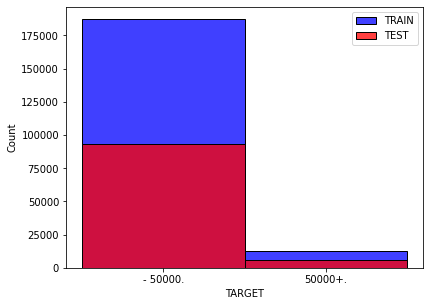

In [485]:
sns.histplot(census_income_train.TARGET, color='blue', label='TRAIN')
sns.histplot(census_income_test.TARGET, color='red', label='TEST')
plt.legend()
plt.show()

3. Explore descriptive statistics of numerical variables and explore other things that are of interest to you. 

In [486]:
census_income_train.agg({"AAGE": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew', 'kurtosis'],
                   "AHRSPAY": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "CAPGAIN": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "CAPLOSS": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "DIVVAL": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "NOEMP": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "WKSWORK": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew']
                  })

,AAGE,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,WKSWORK
mean,34.494199,55.426908,4.347190e+02,37.313788,1.975295e+02,1.956180,23.174897
median,33.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,8.000000
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
max,90.000000,9999.000000,9.999900e+04,4608.000000,9.999900e+04,6.000000,52.000000
var,497.776045,75568.060368,2.206680e+07,73927.667758,3.936905e+06,5.593819,595.920755
std,22.310895,274.896454,4.697531e+03,271.896428,1.984164e+03,2.365126,24.411488
skew,0.373290,8.935097,1.899082e+01,7.632565,2.778650e+01,0.751561,0.210169
kurtosis,-0.732824,NaN,NaN,NaN,NaN,NaN,NaN


In [487]:
census_income_test.agg({"AAGE": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew', 'kurtosis'],
                   "AHRSPAY": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "CAPGAIN": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "CAPLOSS": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "DIVVAL": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "NOEMP": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew'],
                   "WKSWORK": ['mean', 'median', 'min', 'max', 'var', 'std', 'skew']
                  })

,AAGE,AHRSPAY,CAPGAIN,CAPLOSS,DIVVAL,NOEMP,WKSWORK
mean,34.628596,54.461268,4.257886e+02,35.919458,1.924947e+02,1.956156,23.185331
median,33.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000,8.000000
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
max,90.000000,9900.000000,9.999900e+04,4608.000000,9.999900e+04,6.000000,52.000000
var,498.782939,73009.468318,2.131480e+07,70503.659244,3.391964e+06,5.590062,594.832313
std,22.333449,270.202643,4.616796e+03,265.525252,1.841728e+03,2.364331,24.389184
skew,0.371770,8.757473,1.929506e+01,7.795863,2.537008e+01,0.753843,0.209719
kurtosis,-0.734737,NaN,NaN,NaN,NaN,NaN,NaN


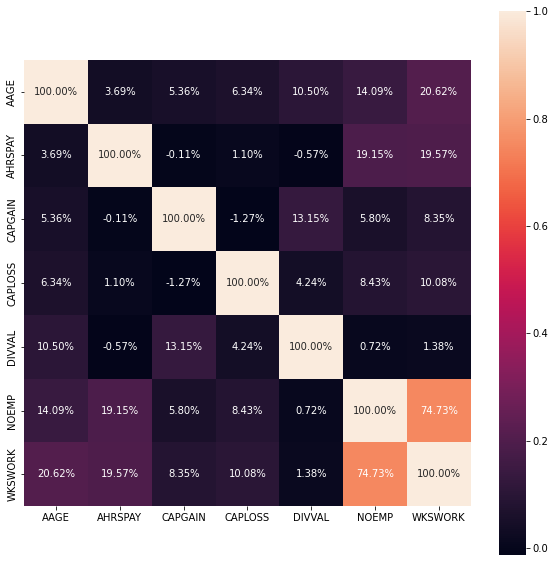

In [488]:
plt.rcParams['figure.figsize'] = (10,10)
corr = census_income_train.corr()
sns.heatmap(corr, annot=True, square=True, fmt=".2%")
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

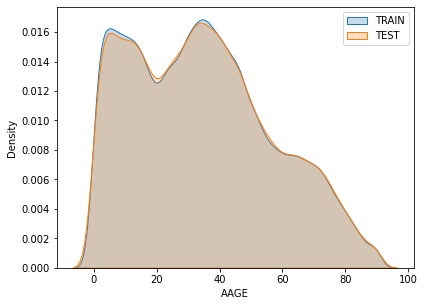

In [489]:
sns.kdeplot(census_income_train.AAGE, shade=True, label='TRAIN')
sns.kdeplot(census_income_test.AAGE, shade=True, label='TEST')
plt.legend()
plt.show()

In [490]:
# sns.kdeplot(census_income_train.AHRSPAY, shade=True, label='TRAIN')
# sns.kdeplot(census_income_test.AHRSPAY, shade=True, label='TEST')
# plt.legend()
# plt.show()

In [491]:
# sns.kdeplot(census_income_train.CAPGAIN, shade=True, label='TRAIN')
# sns.kdeplot(census_income_test.CAPGAIN, shade=True, label='TEST')
# plt.legend()
# plt.show()

In [492]:
# sns.kdeplot(census_income_train.CAPLOSS, shade=True, label='TRAIN')
# sns.kdeplot(census_income_test.CAPLOSS, shade=True, label='TEST')
# plt.legend()
# plt.show()

In [493]:
# sns.kdeplot(census_income_train.DIVVAL, shade=True, label='TRAIN')
# sns.kdeplot(census_income_test.DIVVAL, shade=True, label='TEST')
# plt.legend()
# plt.show()

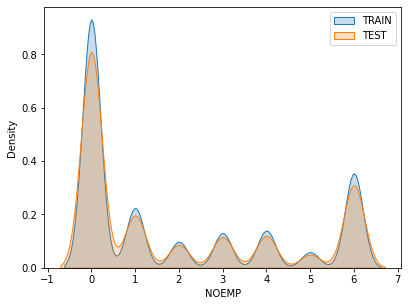

In [494]:
sns.kdeplot(census_income_train.NOEMP, shade=True, label='TRAIN')
sns.kdeplot(census_income_test.NOEMP, shade=True, label='TEST')
plt.legend()
plt.show()

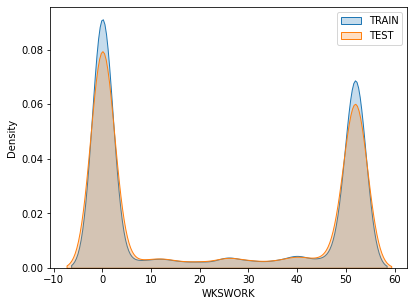

In [495]:
sns.kdeplot(census_income_train.WKSWORK, shade=True, label='TRAIN')
sns.kdeplot(census_income_test.WKSWORK, shade=True, label='TEST')
plt.legend()
plt.show()

Submit your code file.


Then also submit a PowerPoint that includes the following:

- Goal of analysis
- Description of the data: Input variables and output variable 
- Data cleaning:
    - What did you discover about the data that required cleaning? Support your answer with examples, but keep it brief. 
    - How did you handle the data cleaning? What exactly did you do?
- Exploratory Analysis:
    - distribution of output (present appropriate graphs that capture the distribution of training and test set)
    - descriptive statistics for numerical variables (present tables that include mean, median, variance, standard deviation, maximum value, minimum value, kurtosis, and skewness for numerical variables)
    - etc.
- Include another important preprocessing task that you deem relevant